*The survey was conducted between July 2024 and september 2024 among CREST researchers on their digital practices. This summary higlights the main results.*

A total of **89** respondents answered the survey (**81** completed it totally, with a mean duration of **14** minutes ; only some question were mandatory so the total number of respondents can vary). 

::: {.content-hidden}

This notebook is a first exploration of the survey conducted on software practices at CREST

TODO : 

- questions about softwares to analyze
- identify results
- syntetize plain text answers

# Survey analysis

## Load and clean data

- remove questionnary finished in less than 1 minutes
  
:::

In [31]:
#!pip install openpyxl
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import pyshs

In [230]:
#| output: false
#| echo: false

# LOAD DATA

df = pd.read_csv("../data/results-survey323625.csv")
df = df.set_index("Response ID")
#t = pd.DataFrame(pd.Series(list(df.columns)))
#t["reco"] = None
#t.to_csv("reco_columns.csv", index=False)
reco_col = pd.read_csv("./reco_columns.csv") 
reco_col = dict(reco_col.set_index("0").dropna()["reco"])
df.columns = [(lambda i: reco_col[i] if i in reco_col else i)(i) for i in df.columns]
df.head(2)

# filter 
f = df["time"]>60
df = df[f]
print("Number of respondents", len(df))

Number of respondents 89


Mean time: 14.7


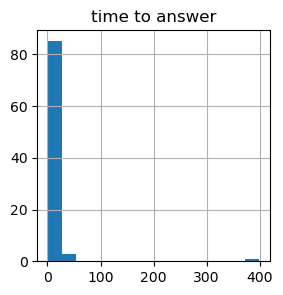

In [217]:
#| output: false
#| echo: false

fix,ax = plt.subplots(figsize=(3,3))
(df["time"]/60).hist(bins=15)
plt.title("time to answer")
print(f"Mean time: {(df['time']/60).mean():.3}")

## Respondents profile

<Axes: >

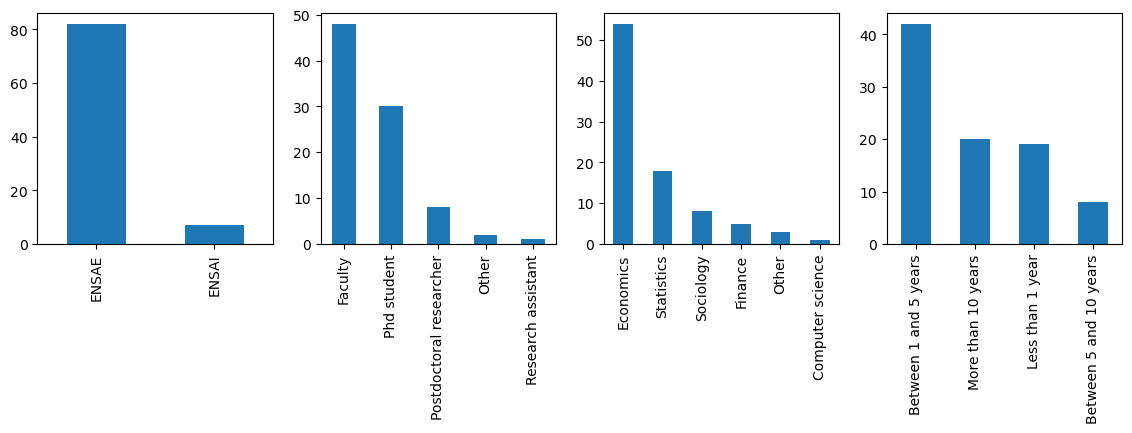

In [12]:
#| output: false
#| echo: false

fix, ax = plt.subplots(1,4, figsize=(14,3))
df["place"].value_counts().plot(kind="bar", ax=ax[0])
df["status"].value_counts().plot(kind="bar", ax=ax[1])
df["field"].value_counts().plot(kind="bar", ax=ax[2])
df["time_at_crest"].value_counts().plot(kind="bar", ax=ax[3])

Respondents are mainly ENSAE researchers (**92%**), mostly faculty/phd student, with a high proportion of economists (**61%**)

In [110]:
import numpy as np
tab = pd.concat({
    "Organization":pyshs.tri_a_plat(df, "place"),
"Field":pyshs.tri_a_plat(df, "field"),
"Status":pyshs.tri_a_plat(df, "status"),
"Seniority": pyshs.tri_a_plat(df, "time_at_crest")})
tab.columns = ["N","%"]
def color_b(s):
    return ["background-color: white;" for i in s]
#tab.style.apply_index(color_b)
tab

N      %
Organization ENSAE                    82.0   92.1
             ENSAI                     7.0    7.9
             Total                    89.0  100.0
Field        Computer science          1.0    1.1
             Economics                54.0   60.7
             Finance                   5.0    5.6
             Other                     3.0    3.4
             Sociology                 8.0    9.0
             Statistics               18.0   20.2
             Total                    89.0  100.0
Status       Faculty                  48.0   53.9
             Other                     2.0    2.2
             Phd student              30.0   33.7
             Postdoctoral researcher   8.0    9.0
             Research assistant        1.0    1.1
             Total                    89.0   99.9
Seniority    Between 1 and 5 years    42.0   47.2
             Between 5 and 10 years    8.0    9.0
             Less than 1 year         19.0   21.3
             More than 10 years       20.0   22.5
             Total                    89.0  100.0

## Digital practices

Almost all respondents (**87%**) are involved in digital processing of data (including simulations) : **99%** are using numeric data, **51%** textual data, **14%** images and **4%** audio. More specifically, **29%** uses experimental data.

In [186]:
#| output: false
#| echo: false

print(df["digital_processing"].value_counts(normalize=True))
print(df["experimentation"].value_counts(normalize=True))
pd.concat({i.replace("data_",""):pyshs.tri_a_plat(df, i) for i in ["data_numeric","data_text","data_image", "data_audio"]})

Yes    0.86747
No     0.13253
Name: digital_processing, dtype: float64
No, it is not my methodology                          0.614458
Yes, sometimes                                        0.168675
Yes, frequently                                       0.120482
No, but I plan at some time in the future to do it    0.096386
Name: experimentation, dtype: float64


Effectif  Pourcentage (%)
numeric No          1.0              1.4
        Yes        71.0             98.6
        Total      72.0            100.0
text    No         35.0             48.6
        Yes        37.0             51.4
        Total      72.0            100.0
image   No         62.0             86.1
        Yes        10.0             13.9
        Total      72.0            100.0
audio   No         69.0             95.8
        Yes         3.0              4.2
        Total      72.0            100.0

There is a wide diversity of practices at CREST, both regarding computing activites or storage. More than half of the respondant uses dataset around 1 Gb or less (**52%**), and only **7%** declared to use a dataset bigger than 100 Gb (**10%** reported to not know).

Overall, **83%** reported to have enough computing ressources and **77%** they had enought storage. Nevertheless, a few respondents reported the limit of available ressources.

> My research is in computational statistics and machine learning. You can't seriously compete with other teams in this field without access to big clusters (100s of CPU cores, GPUs).

The question of getting enough GPU memory (VRAM) for LLM was mentionned a few time. Comments were made on the necessity of flexible cloud storage.

The diversity of practices is visible on the hardware used. For instance, the distribution for the question *'on which computers do you perform these data processing tasks/computations ?'* :

In [170]:
tab = {}
for v in [i for i in df.columns if "On which computers do you perform these data processing tasks/computations ?" in i]:
    t = pyshs.tri_a_plat(df, v)
    t.columns = ["N","%"]
    tab[v.replace("On which computers do you perform these data processing tasks/computations ?","")] = t
pd.concat(tab, axis=1)

[Locally, with my office computer]         \
                                         N      %   
No                                    48.0   57.8   
Yes                                   35.0   42.2   
Total                                 83.0  100.0   

        [Locally, on my laptop (GENES/CREST or personal)]         \
                                                        N      %   
No                                                  26.0    31.3   
Yes                                                 57.0    68.7   
Total                                               83.0   100.0   

        [Locally, on a dedicated computer]          [With GENES servers]  \
                                         N      %                      N   
No                                    79.0   95.2                   53.0   
Yes                                    4.0    4.8                   30.0   
Total                                 83.0  100.0                   83.0   

               [With server outside GENES infrastructure]         
           %                                            N      %  
No      63.9                                         64.0   77.1  
Yes     36.1                                         19.0   22.9  
Total  100.0                                         83.0  100.0

And for the question *'Where do you currently store your data ?'*

In [183]:
tab = {}
for v in [i for i in df.columns if "Where do you currently store your data ?" in i]:
    t = pyshs.tri_a_plat(df, v)
    t.columns = ["N","%"]
    tab[v.replace("Where do you currently store your data ?","")] = t
pd.concat(tab, axis=1)

[Locally, with my office computer]         \
                                         N      %   
No                                    55.0   66.3   
Yes                                   28.0   33.7   
Total                                 83.0  100.0   

        [Locally, on my laptop (GENES/CREST or personal)]         \
                                                        N      %   
No                                                  30.0    36.1   
Yes                                                 53.0    63.9   
Total                                               83.0   100.0   

        [Locally, on a dedicated computer]         \
                                         N      %   
No                                    80.0   96.4   
Yes                                    3.0    3.6   
Total                                 83.0  100.0   

        [With the ABRA server in GENES]         \
                                      N      %   
No                                 78.0   94.0   
Yes                                 5.0    6.0   
Total                              83.0  100.0   

        [With other GENES servers (than ABRA)]         \
                                             N      %   
No                                        68.0   81.9   
Yes                                       15.0   18.1   
Total                                     83.0  100.0   

        [With the CASD outside GENES]         \
                                    N      %   
No                               65.0   78.3   
Yes                              18.0   21.7   
Total                            83.0  100.0   

        [With other servers outside GENES]         
                                         N      %  
No                                    58.0   69.9  
Yes                                   25.0   30.1  
Total                                 83.0  100.0

In [180]:
#| output: false
#| echo: false

print("Dataset", df["dataset_size"].value_counts(normalize=True))

print("Enough essources", df["enough_ressources"].value_counts(normalize=True))
print(list(df["enough_ressources_no"].dropna()))

print("Enough storage", df["enough_storage"].value_counts(normalize=True))
print(list(df["enough_storage_no"].dropna()))

Dataset Less than 1 Go         0.301205
Approximately 10 Go    0.289157
Approximately 1 Go     0.228916
You don't know         0.108434
More than 100 Go       0.072289
Name: dataset_size, dtype: float64
Enough essources Yes    0.831325
No     0.168675
Name: enough_ressources, dtype: float64
['Our department bought almost no database', "I'm fine because I am part of 3 teams with access to clusters. ", "My research is in computational statistics and machine learning. You can't seriously compete with other teams in this field without access to big clusters (100s of CPU cores, GPUs). ", 'lack of GPU for large (70B+) LLM for data annotation', 'I would need to have access to a powerful server to which I can have access from home in an efficient way. The current one is too slow so in the end I do not use it. ', "I'd love a local gpu, not the Google colab one", '8GB of RAM is really really low to do research + the storage is very limited on CREST’s PCs.', 'I have storage issue', 'Need more cor

## Software practices

Regarding operating systems, the majority (**70%**) uses Windows, on third MacOs (36%) and only 13.5 uses Linux.

                  Effectif  Pourcentage (%)
os_windows No         27.0             30.3
           Yes        62.0             69.7
           Total      89.0            100.0
os_mac     No         53.0             59.6
           Yes        36.0             40.4
           Total      89.0            100.0
os_unix    No         77.0             86.5
           Yes        12.0             13.5
           Total      89.0            100.0
os_other   Total       0.0              0.0


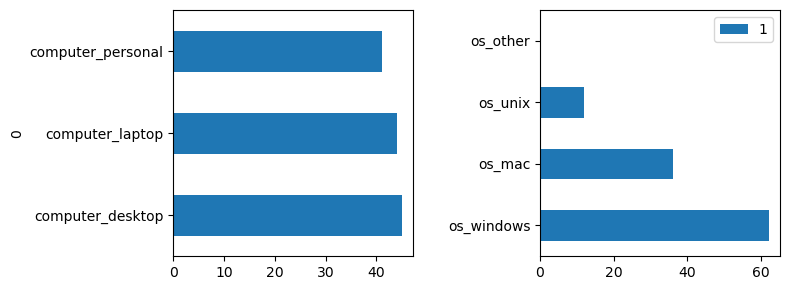

In [128]:
#| output: false
#| echo: false
print(pd.concat({i:pyshs.tri_a_plat(df, i) for i in [i for i in df.columns if "os_" in i]}))
fix,ax = plt.subplots(1, 2, figsize=(8,3))
pd.DataFrame([[i, (df[i]=="Yes").sum()] for i in df.columns if "computer_" in i]).set_index(0).plot(kind="barh", ax=ax[0], legend=False)
pd.DataFrame([[i, (df[i]=="Yes").sum()] for i in df.columns if "os_" in i]).set_index(0).plot(kind="barh", ax=ax[1])
plt.tight_layout()
plt.ylabel("");

In [129]:
#| output: false
#| echo: false

df["dedicated_desktop"].value_counts(normalize=True)

Yes    0.58427
No     0.41573
Name: dedicated_desktop, dtype: float64

A majority of respondents (58%) reported to need a desktop computer.

In [221]:
# | output: false
#| echo: false

print(df["essential_software"].dropna()[0:10])

softwares = ["python", "matlab", "stata"]
print(len(df["essential_software"].dropna()))
for s in softwares:
    print(s, (df["essential_software"].dropna().str.lower().str.contains(s)).mean())

1                  R, STATA, Python, Winedt, Office 365
2     Matlab, Stata, Mathematica, Arcgis, and Spss.\...
3                   TekMaker\nR\nMatlab\nPython\nGurobi
5              Python, Stata, r, matlab, windows office
6                                                Python
9     StatTransfer, Stata, R, Windows Package (Word,...
10    Microsoft Office, Overleaf, Dropbox, R, Python...
11     mainly R, sometimes Python, SAS, Stata and Excel
12    LaTeX, python, VSCode, Zotero.\nMS Word, MS Ou...
14    Rstudio, python, putty, winscp, mailbox, overl...
Name: essential_software, dtype: object
68
python 0.45588235294117646
matlab 0.3235294117647059
stata 0.5735294117647058


The main softwares deemed to be necessary  are Stata, R, Python, Matlab, Dropbox and Latex. 

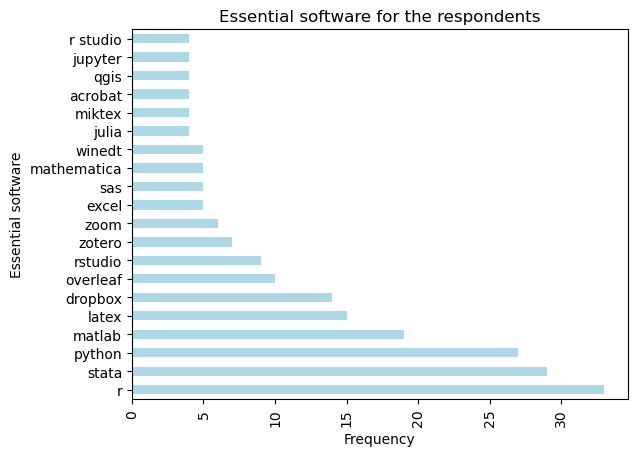

In [262]:
#| echo: false

# TODO : check the count
# TODO : On each field (Economics, socio), see which are the essential software

#file to clean manually
#df["essential_software"].dropna().to_csv("col_essential_software_reco.csv")

#col = pd.read_csv("col_essential_software_reco.csv")
#df = df.join(col)

answer_non_vide = df["essential_software_reco"].dropna()
words_lists=answer_non_vide.str.split(r',|\n|and|-|/|&|;|:|\(|\)|ms') 

# Supprimer les espaces dans les champs de chaque liste
words_lists = words_lists.apply(lambda x: [word.strip().lower() for word in x])

# Compter les mots dans toutes les listes combinées
all_words = [word for sublist in words_lists for word in sublist]
word_count = Counter(all_words)
# Afficher les mots les plus fréquents
word_count_list  = word_count.most_common() 

word_count_list = [list(item) for item in word_count_list if item[0] != '']

tab = pd.DataFrame(word_count_list, columns=["software", "N"]).set_index("software")

tab[0:20].plot(kind="barh", legend=False, color="lightblue")

# Ajouter des labels et un titre
plt.ylabel('Essential software')
plt.xlabel('Frequency')
plt.xticks(rotation='vertical')
plt.title('Essential software for the respondents');

Only 15% of the respondents are paying software with their research funds. Some examples are : databases access, chatGPT, MaxQDA... More (43%) are paying software with their own pocket money : Dropbox, Claude/ChatGPT, Zotero storage, Overleaf, Dropbox. To note : some of those software are available in the laboratory offer.

To the question on the needs, several suggestions were made : chatGPT, Acrobat Pro, Dropbox/Google drive cloud storage, OCR software, or Premium Overleaf account

The current programming practices at CREST shows the diversity of languages, with a dominant of R, Python and Stata.

In [195]:
tab = {}
for v in ["programmation_r", "programmation_python", "programmation_julia", "programmation_stata", "programmation_matlab", "programmation_sas"]:
    t = pyshs.tri_a_plat(df, v)
    t.columns = ["N","%"]
    tab[v.replace("programmation_","")] = t
pd.concat(tab, axis=1)

r        python        julia        stata        matlab         \
          N      %      N      %     N      %     N      %      N      %   
No     30.0   36.1   25.0   30.1  72.0   86.7  39.0   47.0   52.0   62.7   
Yes    53.0   63.9   58.0   69.9  11.0   13.3  44.0   53.0   31.0   37.3   
Total  83.0  100.0   83.0  100.0  83.0  100.0  83.0  100.0   83.0  100.0   

        sas         
          N      %  
No     73.0   88.0  
Yes    10.0   12.0  
Total  83.0  100.0

In [225]:
# | output: false
#| echo: false

df["programmation_autre"].value_counts()

GAMS                          2
Latent Gold                   1
fortran                       1
rust (maybe in the future)    1
Gauss                         1
Mathematica                   1
Name: programmation_autre, dtype: int64

In [143]:
#| output: false
#| echo: false

print(df["paying_software_projects"].value_counts(normalize = True))
df["paying_software_projects_precision"].dropna()

No     0.847059
Yes    0.152941
Name: paying_software_projects, dtype: float64


2                          CEIC database and Bloomberg.
6        No me but the PI of my team : Prodigy, Chatgpt
9                                   Latent Gold & MPlus
20                                   Grammarly, dropbox
40                                              ChatGPT
46                                               maxqda
47                       WinEdt installed on my laptops
58                                             CASD box
68    I have a premium ChatGPT account paid for by a...
99                            Overleaf\nDeepL\nChatGPT 
Name: paying_software_projects_precision, dtype: object

A lot of software paid from researcher's poket

In [145]:
#| output: false
#| echo: false

print(df["paying_software_perso"].value_counts(normalize = True))
df["paying_software_perso_precision"].value_counts()

No     0.564706
Yes    0.435294
Name: paying_software_perso, dtype: float64


Dropbox                                                                                                                8
Mentimeter                                                                                                             1
Heroku to deploy a web app, GitHub for large file storage, Dropbox                                                     1
WinEdt                                                                                                                 1
Google Drive (2T), Chat GPT Premium - I am hoping to use my research funds to pay these services once I get settled    1
chat gpt, but it is ok                                                                                                 1
Overleaf                                                                                                               1
Overleaf, Claude (AI)                                                                                                  1
Grammarly Premium, ChatGPT, Goog

There is a few specific demand to access dedicated software (N Vivo, premium subscription for services, ...), especially for generating models.

In [154]:
#| output: false
#| echo: false

list(df["software_need"].dropna())

['Bloomberg!',
 'No',
 'I would really like to have chatgpt premium as well',
 'I could not find QGIS or ArcGis in "Ulysse_Prod_App" thus I use QGIS on my personal laptop.',
 'no',
 'No',
 'Overleaf\nLimesurvey',
 'ChatGPT',
 'docker',
 'exchange alternative for linux, sublime text premium',
 'Acrobat Pro on my laptop',
 'Dropbox/Google drive (any cloud storage space)',
 'OCR software (Adobe pro or a less expensive one), LLM software',
 'My foreign partners use box.com rather than OneDrive or Dropbox',
 'Premium overleaf account',
 'Chat GPT4',
 'Google Drive (unlimited) would be useful. I know this is available for businesses/education. N Vivo - qualitative coding software. I am not sure if Qualtrics is available, but it is important tool for creating online surveys.',
 'Not really',
 'No.']

In [157]:
#| output: false
#| echo: false

print(df["training_offer"].value_counts(normalize=True))
list(df["training_offer_ideas"].dropna())

No     0.595238
Yes    0.404762
Name: training_offer, dtype: float64


['If not a training, at least information on available software. Maybe short training on a few depending on the demand. ',
 'No, maybe the new software installed',
 'It would be great to have a mandatory course for Git, for all researchers',
 'Explain the resources available at CREST',
 'Trainings on how to use git tools for instance.',
 'Help using Github and/or parallel CPU/GPU coding with Matlab',
 'data management',
 'Some training sessions about existing IT offerings for junior faculty joining CREST (But that might come later)',
 'Trainings on how to use Onyxia and Spark',
 'Perhaps a presentation of available software solutions once a year would be helpful, but maybe this is already organized and I am just not aware of it',
 'Git, onyxia, ',
 'Please Update cluster',
 'Python']

In [193]:
#| output: false
#| echo: false

print(df["onyxia"].value_counts(normalize=True))
print(df["abra"].value_counts(normalize=True))

Yes, I heard about it but never used    0.445783
No, not at all                          0.337349
Yes, and I tried it at least once       0.120482
Yes, and I use it for my research       0.096386
Name: onyxia, dtype: float64
Never heard of it           0.638554
No, never                   0.301205
Yes, I am still using it    0.060241
Name: abra, dtype: float64


A vast majority of respondents (**74%**) are using generative model for their research, one third reported to use it a lot. Three out of for are using free access solutions.

This use cover a diversity of tasks :

- editing english
- copilot for programming / understanding code
- summarizing articles
- formatting references
- email reformulation
- text annotation for research tasks
- exploring topics

In [201]:
#| output: false
#| echo: false

print(df["gpt_use"].value_counts(normalize=True))
print(df["gpt_use_choice"].value_counts(normalize=True))
list(df["gpt_use_reason"].dropna())

Yes, sometime    0.370370
Yes, a lot       0.370370
No               0.259259
Name: gpt_use, dtype: float64
You use only free access solutions              0.773333
You have one (or many) personal subscription    0.160000
You have a professional subscription            0.066667
Name: gpt_use_choice, dtype: float64


['editing english, code',
 'Boring simple tasks (create tikz code, format text...) + a bit a coding help',
 'Programming ; writing',
 'Summarize articles, draft text',
 'To help me write my code',
 'As help for coding',
 'Editorial services: reformulating, summarising, etc. ',
 'English correction, coding snippets',
 'For proofreading texts and understanding code written by others.',
 'coding and writing',
 'Quick responses to various questions, code, photo edit, ',
 'pproofreading, coding',
 'For the code (R especially)\nTo correct mistakes when I write in English',
 'Formatting reference lists, doing preliminary literature checks, helping with coding questions…',
 'Small questions usually. Reformulation, clues on code function',
 'Reformulating emails, reformulation drafts of papers. I would like to use it more to help me program (but the free version is bad in Matlab).',
 'ChatGPT for writing and coding',
 'Latex, some code generation, emails',
 "I don't use them in my research but 

## Reproducibility, open source and evolutions

The respondents were asked on the issues of reproducibility of computational results, and a majority considers it important issues for them.

In [202]:
pyshs.tri_a_plat(df, "reproducibility")

,Effectif,Pourcentage (%)
These are distant or non-existent issues in your activity,14.0,17.3
These are important issues in your activity,40.0,49.4
You have encountered these issues in your activity,27.0,33.3
Total,81.0,100.0


On the question of the adoption ofopen source and free software solutions, only **22%** reported to not be familiar with this trend, and **41%** reported to be actively involved.

In [204]:
#| output: false
#| echo: false

df["opensource"].value_counts(normalize = True)

You are actively involved in this trend                                  0.4125
You are not actively using them, but you are interested in this trend    0.3625
You are not familiar with this trend                                     0.2250
Name: opensource, dtype: float64

Digital practices are constantly evolving, and new solutions are emerging. An open field allowed to collect insights and comments on those evolutions. For instance, tools like Dropbox or Google Drive seemed to have found their place in the research workflow. This underline the importance of flexible storage.

> My co-authors at other research institutions (Berkeley, Chicago, Columbia, Harvard) all use Dropbox and/or Google Drive to store the data involved in our research projects. To work collaboratively on our projects, I therefore need to use Dropbox and Google Drive, on which relatively large amounts of data are stored (about 3 To for my currently active projects). The free tier plans are not sufficient: I need to pay for increased storage on both Dropbox and Drive.\nThe current offering from CREST to use OneDrive is unfortunately not sufficient.

It appears a need for improvement in accessing existing solutions : SSH connection to the servers, more information of available ressources, etc. There is a demand for more training sessions on software and IT offerings (**40%**), for instance parallel computing, Git/Github good practices, and an overview of available ressources at CREST.

For instance, the development of solutions as Onyxia is mentioned as a positive point to access shared ressources. For the moment, only **22%** of the respondents used Onyxia once, with **33%** having no idea of its existence.

> "If there is an infrastructure that supports me, I would love to make my research data accessible and reproducible. Onyxia is a good tool and that should be promoted for usage within our laboratory."

The necessity to get available GPU for deep learning and LLM practices is clearly highlighted. Another important point was the need for secured storage accredited to store sensitive informations.

> "In terms of architecture, I'm overall satisfied with what we have in the department. The only need I have that is not currently fulfilled would be a computing server sufficient secure to store confidential data. Something in between the existing computing servers and CASD (which cannot host easily confidential data that I can obtain from third parties, and is very expensive).  It would be amazing to set up this kind of server. "



Finaly, the developement of AI assistant creates new practices which encounter several constraints

> "We need more flexibility in the use of online service such as AI (Chatgpt, Claude, ...), Deepl, Overleaf, Grammarly, ... In particular, it's completely absurd that we can't use our research fund to pay for the online service."


In [207]:
#| output: false
#| echo: false

list(df["evolution"].dropna())

['CASD is very expensive and many data providers to not require that much security. An in-home solution of storage with a local controlled access would be sufficient for many storage of simple dataset which require a minimum level of GDPR security and it would save a lot of research funds to not use CASD for them.',
 'I will need more GPU',
 'Computational power would be crucial. \nUser friendly interfaces offering access to computational resources are necessary. \nUpdated versions of software are required. ',
 'Not that i know',
 'No',
 'I will turn more to empirics, so will use more intensively my access to the servers?',
 'I will potentially need to run code which require GPUs.',
 "In terms of architecture, I'm overall satisfied with what we have in the department. The only need I have that is not currently fulfilled would be a computing server sufficient secure to store confidential data. Something in between the existing computing servers and CASD (which cannot host easily confide

In [206]:
#| output: false
#| echo: false

for i in list(df["general_comments"].dropna()):
    print("\n"+i)


Could CREST offer VPN service?

There is a VPN service from X, but many databases we have access to are based under the name of ENSAE...

I'm not sure what are ABRA servers, if you mean the clusters (tortank...etc) then I use them yes. They are very convenient and easy to use I think keeping them updated and improving them would be useful (adding a local storage option to replace CASD as mentioned would be nice). Now, I have the impression that not all of them are fully updated with all softwares, a few colleagues have been directed toward the cluster number 6 because Python is not updated on the other clusters. This is problematic because then everybody starts to use the same server and it becomes slow. Maintaining up to date all the HPC is important.

It's Emilien

Stop providing laptops which are remotely controlled by DSI!
This is the rule imposed at Ensai.
It's a huge waste of time for the researchers, counter-productive. 
Explain again and again to Ensai DSI that researchers at 

::: {.content-hidden}
# Points to discuss

- I'm not sure what are ABRA servers, if you mean the clusters (tortank...etc) then I use them yes. They are very convenient and easy to use I think keeping them updated and improving them would be useful (adding a local storage option to replace CASD as mentioned would be nice). Now, I have the impression that not all of them are fully updated with all softwares, a few colleagues have been directed toward the cluster number 6 because Python is not updated on the other clusters. This is problematic because then everybody starts to use the same server and it becomes slow. Maintaining up to date all the HPC is important
- There is a VPN service from X, but many databases we have access to are based under the name of ENSAE...
- Please get the building IT to DNS unblock libgen/sci-hub, or at least fix the issue which causes ENSAE's eduroam and GENES wifis to stop working if using a preset DNS server such as 1.1.1.1 .
- Stop providing laptops which are remotely controlled by DSI!
- I'm using a lot Matlab for my research. But I just can't use the Matlab installed on the servers: it's way, way, way too slow to run! I had to install Matlab locally instead. This is not without costs: I have to switch regularly from my server session (where I do most of my non-Matlab activities) to my local session (where I run Matlab), and each time I switch I have to close all windows. This is also a big problem for some ENSAE/MiE courses that use Matlab (and Dynare): Matlab takes sometimes more than 15 minutes to open, several minutes to run big files, etc. For me, this is by far the Number One problem to solve: install Matlab in such a way that it runs reasonably quickly. Many thanks in advance!
- A similar remark also applies to WinEdt: I've tried to switch to the open source Overleaf and it is really not comparable to WinEdt. It simply does not work for many packages and for complicated documents with a structure.
- More database please please please (e.g. Bloomberg, Wharton Research Data Services, etc)
- I need a reliable backup solution.




:::

</div>
